# Lab 2: Data - Inspect, Explore, Split - Titanic Dataset

### Author: Katie McGaughey
### Date: 03.18.2025

## Introduction
### In this lab, I'm working with the Titanic dataset to explore how different passenger details like sex, age, and class related to survival. The data will be cleaned and visualiztaions will be created to better understand this data.

## Section 1. Import and Inspect the Data
Load the titanic dataset from the directly from the seaborn library for consistency and simplicity.

In [193]:
# Section 1: Import and Inspect the Data

import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Display basic information
print("Basic Info:")
titanic.info()

# Display first 10 rows
print("First 10 rows of the dataset:")
print(titanic.head(10))

# Check for missing values
print("\nMissing Values:")
print(titanic.isnull().sum())

# Display summary statistics
print("\nSummary Statistics:")
print(titanic.describe(include='all'))  # include='all' shows both numeric and categorical summaries

# Display correlation matrix (numeric columns only)
print("\nCorrelation Matrix (numeric features only):")
print(titanic.corr(numeric_only=True))



Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        891 non-null    category
 8  adult_male   891 non-null    bool    
 9  alive        891 non-null    object  
 10  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
First 10 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833 

In [194]:
# Display the Minimun, median and max age
titanic['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

### Reflection 1
1. How many data instances are there? 891 rows (instances)
2. How many features are there? 15 features (columns)
3. What are the names? survived, pclass sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone
4. Are there any missing values? yes - age, embarked, embark_town, deck.
5. Are there any non-numeric features? yes - sex, embarked, class, who, embark_town, alive are categorical.
6. Are the data instances sorted on any of the attributes? No.
7. What are the units of age? Years.
8. What are the minimum, median, and max age? Minimum age was a baby at 0.42 years (about 6m old), Median age around 28 years old and Max age 80 years old.
9. What two different features have the highest correlation? SibSp and Parch
10. Are there any categorical features that might be useful for prediction? Yes, Sex and Pclass (class, passenger part of the ship) are related to survival rates.

## Section 2. Data Exploration and Preparation
2.1 Explore the dataset with charts - and perform feature engineering

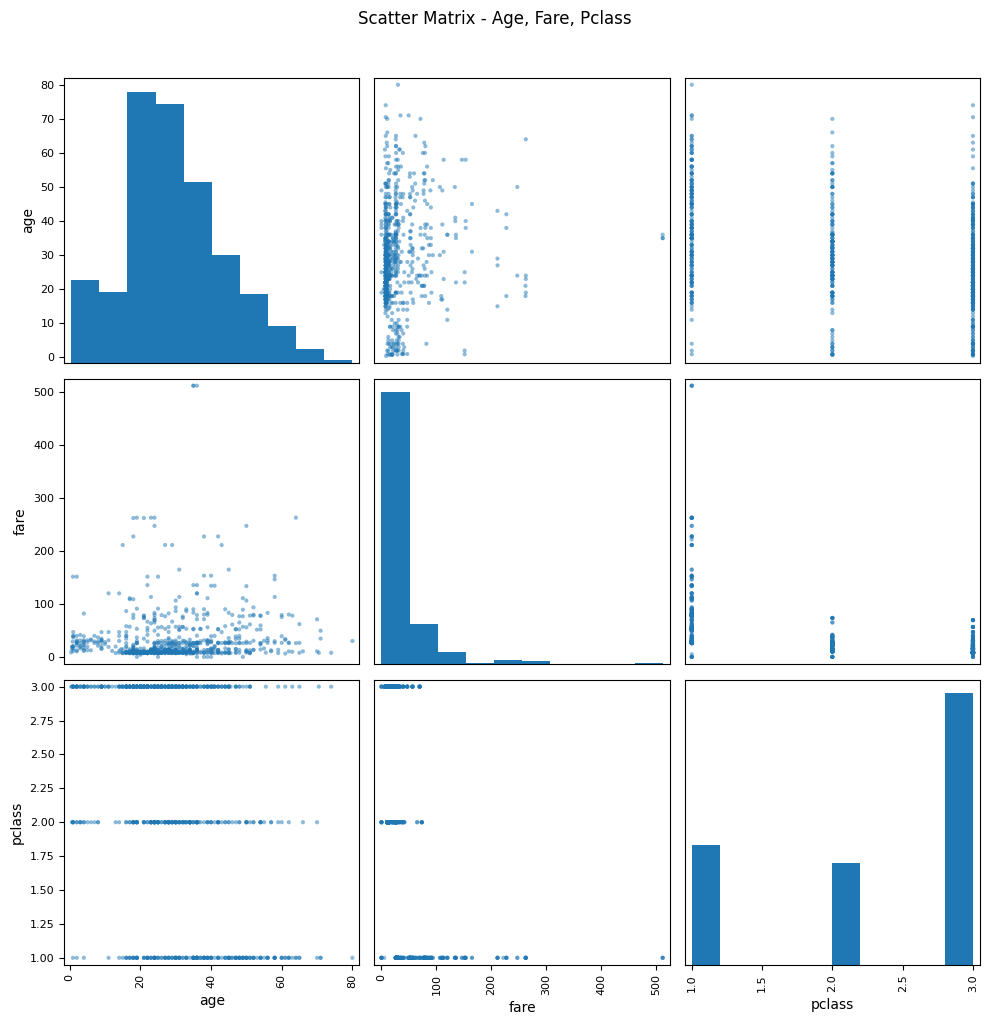

In [195]:
# Section 2.1: Explore Data Patterns and Distributions - Scatter Matrix

# Select only numeric features
attributes = ['age', 'fare', 'pclass']

# Create the scatter matrix
scatter_matrix(titanic[attributes], figsize=(10, 10), diagonal='hist')

# Show the plot
plt.suptitle("Scatter Matrix - Age, Fare, Pclass", y=1.02)
plt.tight_layout()
plt.show()


2.1.1 Create a scatter plot of age vs fare, colored by gender

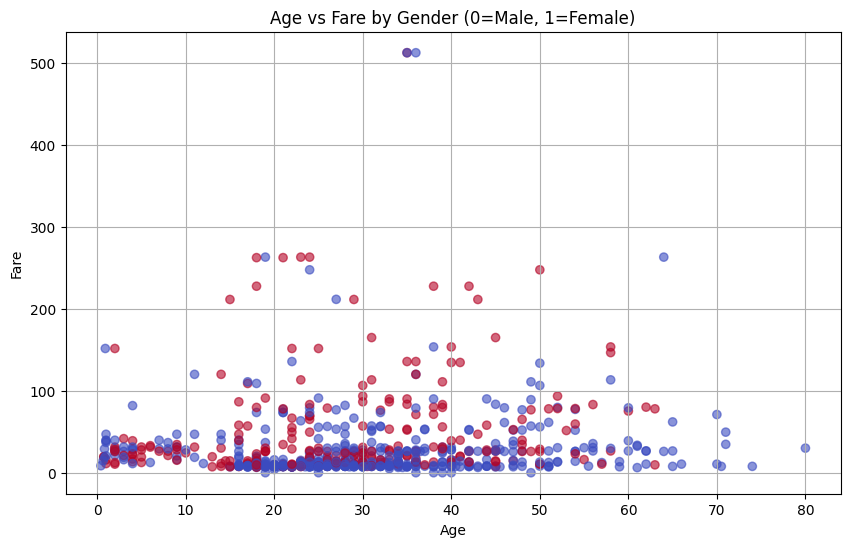

In [196]:
# Scatter Plot - Age vs Fare colored by Gender
# Section 2.2: Scatter Plot - Age vs Fare colored by Gender

plt.figure(figsize=(10, 6))
plt.scatter(
    titanic['age'], 
    titanic['fare'], 
    c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1), 
    cmap='coolwarm', 
    alpha=0.6
)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender (0=Male, 1=Female)')
plt.grid(True)
plt.show()

2.1.2 Histogram - Age Distribution

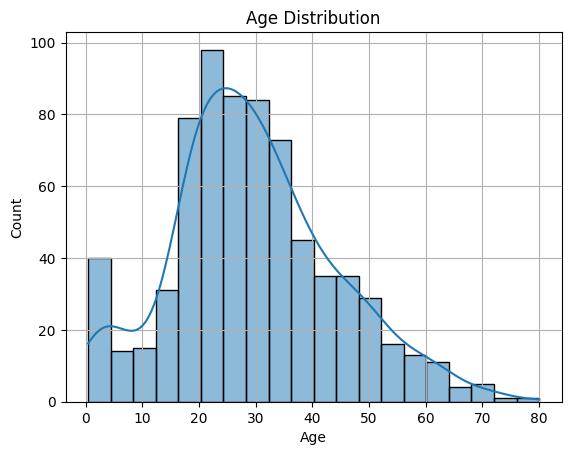

In [197]:
# Histogram of Age
# Plot histogram with KDE (Kernel Density Estimate)
sns.histplot(titanic['age'], kde=True)

# Add title and display
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()


2.1.3 Count Plot – Class Distribution by Survival

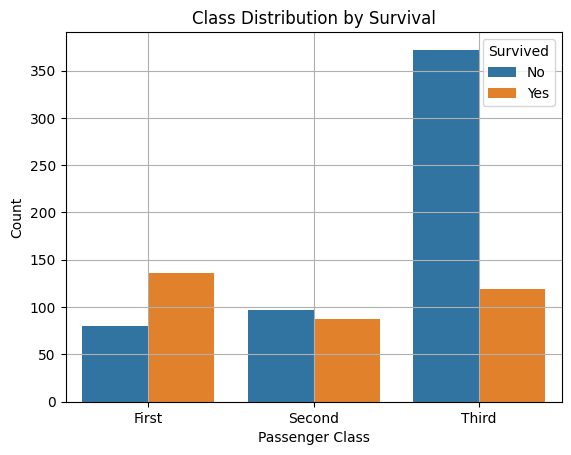

In [198]:
# Count Plot - Class Distribution by Survival
# Count plot: Passenger class with survival hue
sns.countplot(x='class', hue='survived', data=titanic)

# Add title and display
plt.title('Class Distribution by Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(True)
plt.show()


### Reflection 2.1
1. What patterns or anomalies do you notice? 
   - Age and fare do not have a clear linear relationship
   - There are missing age values
   - Some passengers paid very high fares and some fares are 0 (zero).
2. Do any features stand out as potential predictors? 
   - Gender, emales had a higher survival rate.
   - Pclass or Passenger class, Higher class passengers seems to survive more often.
   - Family Size, passengers traveling alone may have lower survival chances.
3. Are there any visible class imbalances? Yes:
   - Survival class are imbalanced, more people did not survive than survived
   - Pclass has more passenger in 3rd class compared to 1st and 2nd.

### Section 2.2 
Handle Missing Values and Clean Data

In [199]:
# Section 2.2: Handle Missing Values and Clean Data

# Fill missing values in 'age' with the median age
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Fill missing values in 'embark_town' with the most frequent value (mode)
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

# After handling missing values, recheck missing values
print("Missing values after cleaning:")
print(titanic.isnull().sum())


Missing values after cleaning:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


/var/folders/02/57dqfrgx6zzfw_sgv9yyk60c0000gn/T/ipykernel_1429/1095074508.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
/var/folders/02/57dqfrgx6zzfw_sgv9yyk60c0000gn/T/ipykernel_1429/1095074508.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

### Section 2.3 
Feature Engineering

In [200]:
# Section 2.3: Feature Engineering

# 1. Create a new feature: Family size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# 2. Convert categorical variables to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 3. Create a binary feature for 'alone':
titanic['alone'] = titanic['alone'].astype(int)

# check
print(titanic[['sex', 'embarked', 'family_size', 'alone']].head())


   sex  embarked  family_size  alone
0    0       2.0            2      0
1    1       0.0            2      0
2    1       2.0            1      1
3    1       2.0            2      0
4    0       2.0            1      1


### Reflection 2.3
1. Why might family size be a useful feature for predicting survival?
   Family size shows if someone was alone or with others. People with family may have had a better chance of survival by helping each other.
2. Why convert categorical data to numeric? Changing categories like male/female to numbers help understand the data

## Section 3. Feature Selection and Justification
### 3.1 Feature Selection and Target Variable
### 3.2 Define X and y

In [201]:
# Section 3.1: Feature Selection and Target Variable
# Selected input features (X): age, fare, pclass, sex, family_size
# Target variable (y): survived

# Section 3.2: Define X and y
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

# Check shape of input and target
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (891, 5)
y shape: (891,)


### Reflection 3:

Why are these features selected? Are there any features that are likely to be highly predictive of survival?

I picked **age, fare, pclass, sex, and family size** because they may affect survival.  
I set **X** as the input features and **y** as the target (survived).  
The shape shows we have **891 rows and 5 features** for X, and **891 labels** in y.


## Section 4. Splitting
Split the data into training and test sets using train_test_split first and StratifiedShuffleSplit second.

In [202]:
# Section 4.1: Basic Train/Test Split

X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(
    X, y, test_size=0.2, random_state=123
)

print("Basic Split → Train size:", len(X_train_basic), " | Test size:", len(X_test_basic))

# Section 4.2: Stratified Train/Test Split
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_index, test_index in splitter.split(X, y):
    X_train_strat = X.iloc[train_index]
    y_train_strat = y.iloc[train_index]
    X_test_strat = X.iloc[test_index]
    y_test_strat = y.iloc[test_index]

print("Stratified Split → Train size:", len(X_train_strat), " | Test size:", len(X_test_strat))

# Section 4.3: Compare Class Distributions
print("\nOriginal Class Distribution:\n", y.value_counts(normalize=True))
print("\nBasic Split - Train Set Class Distribution:\n", y_train_basic.value_counts(normalize=True))
print("\nBasic Split - Test Set Class Distribution:\n", y_test_basic.value_counts(normalize=True))
print("\nStratified Split - Train Set Class Distribution:\n", y_train_strat.value_counts(normalize=True))
print("\nStratified Split - Test Set Class Distribution:\n", y_test_strat.value_counts(normalize=True))


Basic Split → Train size: 712  | Test size: 179
Stratified Split → Train size: 712  | Test size: 179

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64



Basic Split - Train Set Class Distribution:
 survived
0    0.610955
1    0.389045
Name: proportion, dtype: float64

Basic Split - Test Set Class Distribution:
 survived
0    0.636872
1    0.363128
Name: proportion, dtype: float64

Stratified Split - Train Set Class Distribution:
 survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

Stratified Split - Test Set Class Distribution:
 survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


### Reflection 4
1. Why might stratification improve model performance?
   Stratification helps keep the same mix of classes in both training and test sets.
2. How close are the training and test distributions to the original dataset?
   The stratified split is much closer to the original survival rates.
3. Which split method produced better class balance?
   Stratified split keeps the class balance better and helps test the model more fairly.